# Introdução à Computação Simbólica com _sympy_

## Motivação

- O valor de $\pi$ que você usa é finito...

```python
from math import pi
print(pi)
3.141592653589793
```
- E se pudéssemos usá-lo com precisão infinita? 

- 3.141592653589793 é um valor razoavelmente aceitável

- Exemplo: a equipe de engenharia da NASA explica que, usando este valor para calcular o perímetro de uma circunferência com diâmetro igual a 25 bilhões de milhas, o erro de cálculo é próximo de 1,5 polegada [[NASA]](https://www.jpl.nasa.gov/edu/news/2016/3/16/how-many-decimals-of-pi-do-we-really-need/).

## O que é computação simbólica

> *Computação Simbólica* (CS) é uma subárea de estudo da matemática e da ciência da computação que se preocupa em resolver problemas usando objetos simbólicos representáveis em um computador. 

## Para que serve CS? 

- Base de vários *sistemas de computação algébrica* (SCAs). 

- Álgebra computacional, projetos assistidos por computação (CAD)

- Raciocínio automatizado, gestão do conhecimento, lógica computacional, sistemas formais de verificação etc. 

### Como a CS está integrada? 

<!-- Figura -->
<center>
    <img src='../figs/02/comp-simb.png' width=900px> </img>
</center>


Fonte: [[RISC/JKU]](https://risc.jku.at/studying-symbolic-computation/)

## Principais SCAs 

- Maple

- Mathematica 

- MuPad

- Sagemath 

- ...

## Por que *sympy*? 

> O objetivo principal do *sympy* é ser uma biblioteca de manipulação simbólica para Python. 

- 2006 em diante (2019, v. 1.5.1)

Principais características:

- é gratuito;

- é baseado inteiramente em Python;

- é leve e independente.

## Objetos numéricos x objetos simbólicos

Importaremos os módulos `math` e `sympy` para ver diferenças

In [1]:
import math as mt
import sympy as sy
sy.init_printing(pretty_print=True) # melhor impressão de símbolos

In [3]:
mt.pi # numérico

In [5]:
sy.pi # simbólico

Verifiquemos com `type`.

In [6]:
type(mt.pi)

float

In [7]:
type(sy.pi) # é um objeto simbólico

sympy.core.numbers.Pi

Vejamos mais um exemplo:

In [8]:
mt.sqrt(2)

In [9]:
sy.sqrt(2) 

In [10]:
type(mt.sqrt(2))

float

In [11]:
type(sy.sqrt(2)) # é um objeto simbólico

sympy.core.power.Pow

### Função x método 

A partir deste ponto, poderemos ver situações como as seguintes:

- `f(x)`: a função `f` é aplicada ao parâmetro `x`; ex. `print('a')`; `type('a')`

- `a.f()`: `f` é um método sem parâmetro do objeto `a`; ex. `z.conjugate()`

- `a.f(x)`: `f` é um método com parâmetro `x` do objeto `a`; ex. `mt.sqrt(2)`

A partir do último exemplo, podemos dizer que um método é, na verdade, uma função que pertence a um objeto.

### Atribuições com símbolos

Podemos atribuir símbolos a variáveis usando a função `symbols`.

In [15]:
x = sy.symbols('x')
y = sy.symbols('y')

`x` e `y` são símbolos sem valor definido.

In [16]:
x

In [17]:
y

Podemos operar aritmeticamente com símbolos e obter uma expressão simbólica como resultado.

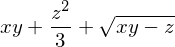

In [13]:
z = sy.symbols('z')
x*y + z**2/3 + sy.sqrt(x*y - z)

**Exemplo**: escreva o produto notável $(x - y)^2$ como uma expressão simbólica.

In [18]:
x**2 - 2*x*y + y**2

Note que o nome da variável não tem a ver com o nome do símbolo. Poderíamos fazer o seguinte:

In [19]:
y = sy.symbols('x') # y é variável; x é símbolo
y

### Atribuição por desempacotamento 

Também poderíamos realizar as atribuições anteriores da seguinte forma: 

In [20]:
x, y, z = sy.symbols('x y z')

### Alfabeto de símbolos 

O *sympy* dispõe de um submódulo chamado `abc` do qual podemos importar símbolos para letras latinas (maiúsculas e minúsculas) e gregas (minúsculas).

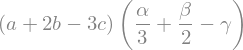

In [21]:
from sympy.abc import a,b,c,alpha,beta,gamma
(a + 2*b - 3*c)*(alpha/3 + beta/2 - gamma) # símbolico

In [22]:
from sympy.abc import D,G,psi,theta
D**a * G**b * psi**c * theta**2 # símbolico

**Nota**: algumas letras já são usadas como símbolos especiais, tais como `O`, que indica "ordem" e `I`, que é o complexo $i$. Neste caso, cuidado deve ser tomado com nomes de variáveis

In [23]:
sy.I # imaginário simbólico 

In [24]:
type(sy.I) 

sympy.core.numbers.ImaginaryUnit

### Símbolos com nomes genéricos

Para criar símbolos genéricos, temos de usar `symbols` ou `Symbol`.

In [28]:
sem_nocao = sy.symbols('nada')
sem_nocao

In [34]:
muito_louco = sy.Symbol('massa')
muito_louco

### Variáveis e símbolos

In [35]:
sem_medo = sem_nocao + 2
sem_medo 

In [37]:
soma = muito_louco + 2
muito_louco = 3 # 'muito_louco' aqui não é o simbólico
soma

## Substituição

A operação de *substituição* permite que: 

1. substituamos variáveis por valores numéricos para avaliar uma expressão ou calcular valores de uma função em um dado ponto.
2. substituamos uma subexpressão por outra.

Para tanto, procedemos da seguinte forma: 

```python
expressao.subs(variavel,valor)
```


**Exemplo**: considere o polinômio $P(x) = 2x^3 - 4x -6$. Calcule o valor de $P(-1)$, $P(e/3)$, $P(\sqrt{3.2})$.

In [42]:
from sympy.abc import x 
P = 2*x**3 - 4*x - 6
P1 = P.subs(x,-1)
Pe3 = P.subs(x,mt.e/3)
P32 = P.subs(x,mt.sqrt(3.2))
print(P1, Pe3, P32)

-4 -8.13655822141297 -1.70674948320040


**Exemplo:** sejam $f(x) = 4^x$ e $g(x) = 2x - 1$. Compute o valor da função composta $f(g(x))$ em $x = 3$. 

In [45]:
f = 4**x
fg = f.subs(x,2*x - 1)
fg

In [46]:
fg.subs(x,3)    

Poderíamos também fazer isso com um estilo "Pythônico":

In [47]:
fg = 4**x.subs(x,2*x - 1).subs(x,3)
fg 

**Exemplo:** se $a(x) = 2^x$, $b(x) = 6^x$ e $c(x) = \cos(x)$, compute o valor de $a(x)b(c(x))$ em $x = 4$

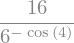

In [48]:
a = 2**x  
b = 6**x
c = sy.cos(x)
(a * b.subs(x,c)).subs(x,4)

Ou, de modo direto:

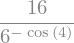

In [49]:
valor = ( 2**x * ( 6**x.subs(x,sy.cos(x))) ).subs(x,4)
valor  

### Avaliação de expressão em ponto flutuante

Note que a expressão anterior não foi computada em valor numérico. Para obter seu valor numérico, podemos usar o método `evalf`.

In [51]:
valor.evalf()  

#### Precisão arbitrária 

`evalf` permite que escolhamos a precisão do cálculo impondo o número de dígitos de precisão. Por exemplo, a última expressão com 20 dígitos de precisão seria:

In [52]:
valor.evalf(20)

Com 55, seria:

In [53]:
valor.evalf(55)

E com 90 seria:

In [54]:
valor.evalf(90)

**Exemplo**: calcule o valor de $e$ com 200 dígitos de precisão.

In [58]:
sy.exp(1).evalf(200)

## Funções predefinidas x funções regulares

Apresentaremos 3 grupos de funções que podem ser criadas em Python

- **funções predefinidas** (*built-in functions*): funções já prontas que podemos usar (ex. `print()`, `type()` , `int()`, `float()`

- **funções regulares**, ou *normais*, *definidas pelo usuário* (do inglês *user-defined functions*, ou simplesmente *UDF*): aquelas que você cria!

Podemos fazer isto de uma maneira usando uma "palavra-chave" (*keyword*) chamada `def` da seguinte forma:

```python
def f(x):
    (...)
    return y
```
- uma UDF **pode ter zero ou mais argumentos**, tantos quantos se queira;
- uma UDF **pode ou não ter valor de retorno**;

Vamos entender as UDFs com exemplos.

**Exemplo:** Suponha que você é um(a) analista de dados do mercado imobiliário e está estudando o impacto do repasse de comissões pagas a corretores mediante vendas de imóveis. Você, então, começa a raciocinar e cria um modelo matemático bastante simples que, antes de tudo, precisa calcular o valor do repasse a partir do preço de venda. 

Se $c$ for o percentual de comissão, $V$ o valor da venda do imóvel e $r$ o valor a ser repassado para o corretor, então, a função a ser definida é 

$$r(V) = c\, V,$$ 

assumindo que $c$ seja um valor fixo. 

Digamos que $c$ corresponda a 1.03% do valor da venda do imóvel. Neste caso podemos criar uma UDF para calcular $r$ para nós da seguinte forma:

In [65]:
def repasse(V): 
    r = 0.0103*V  
    return r

Para $V = \, R\$ \, 332.130,00$:

In [62]:
repasse(332130.0)

O que é necessário observar:

- `def` seguido pelo *nome* da função 
- argumentos enclausurados por parênteses
- os dois-pontos (`:`) são obrigatórios
- *escopo* da função, que deve ser escrito em uma ou mais linhas indentadas (pressione `TAB` para isso, ou use 4 espaços)
- o valor de retorno, se houver, é posto na última linha do escopo.

Podemos atribuir os valores do argumento e resultado a variáveis:

In [66]:
V = 332130
rep = repasse(V)
rep

Nomes iguais de variável e função são permissíveis.

In [67]:
repasse = repasse(V) # 'repasse' à esquerda é uma variável; à direita, função
print(repasse)

3420.939


Todavia, isto pode ser confuso e é bom evitar.

O estilo "Pythônico" de escrever permite que o valor de retorno não seja explicitamente declarado. No escopo

```python
...
    r = 0.0103*V  
    return r
```
 a variável `r` não é necessária.
 
Python é inteligente para permitir o seguinte:

In [68]:
def repasse(V): 
    return 0.0103*V

# note que aqui não indentamos a linha. 
# Logo esta instrução NÃO pertence ao escopo da função.
repasse(V)

Podemos criar uma função para diferentes valores de `c` e `V` usando *dois* argumentos:

In [41]:
def repasse_c(c,V): # esta função tem outro nome
    return c*V

In [42]:
c = 0.0234 # equivaleria a uma taxa de repasse de 2.34%
V = 197432 # o valor do imóvel agora é R$ 197.432,00
repasse_c(c,V)

A ordem dos argumentos importa:

In [43]:
V = 0.0234 # este deveria ser o valor de c
c = 197432 # este deveria ser o valor de V
repasse_c(c,V)

Por que o valor resultante é o mesmo? Porque a operação no escopo da função é uma multiplicação, `c*V`, que é comutativa independentemente do valor das variáveis. Porém, digamos que um segundo modelo tenha uma forma de cálculo distinta para a comissão dada por

$$r_2(V) = c^{3/5} \, V$$

Neste caso:

In [44]:
def repasse_2(c,V):
    return c**(3/5)*V

V = 197432
c = 0.0234

repasse_2(c,V)

Porém, se trocarmos o valor das variáveis, a função `repasse_2` calculará um valor distinto. Embora exista um produto também comutativo, o expoente `3/4` modifica apenas o valor de `c`.

In [45]:
# variáveis com valores trocados
c = 197432
V = 0.0234

repasse_2(c,V)

A ordem com que escrevemos os argumentos tem importância relativa aos valores que passamos e ao que definimos: 

In [46]:
# variáveis com valores corretos
V = 197432
c = 0.0234

def repasse_2_trocada(V,c): # V vem antes de c
    return c**(3/5)*V
    
repasse_2_trocada(V,c)

Mas,

In [47]:
# os valores das variáveis estão corretos, 
# mas foram passados para a função na ordem errada
repasse_2_trocada(c,V) 

e 

In [48]:
# a ordem dos argumentos está de acordo com a que foi definida
# mas os valores das variáveis foram trocados
V = 197432
c = 0.0234
repasse_2_trocada(c,V) 

## Modelos matemáticos simbólicos

A partir do que aprendemos, podemos definir modelos matemáticos completamente simbólicos.

In [49]:
from sympy.abc import c,V

def repasse_2_simbolica(c,V):
    return c**(3/5)*V

Se chamarmos esta função, ela será um objeto simbólico.

In [50]:
repasse_2_simbolica(c,V)

Atribuindo em variável:

In [51]:
rep_simb = repasse_2_simbolica(c,V)

In [52]:
type(rep_simb) # é um objeto simbólico

sympy.core.mul.Mul

**Exemplo:** Suponha, agora, que seu modelo matemático de repasse deva considerar não apenas um percentual $c$ pré-estabelecido, mas também um valor de "bônus" adicional concedido como prêmio pela venda do imóvel. Considere, então, que o valor deste bônus seja $b$. Diante disso, nosso novo modelo teria uma fórmula como a seguinte: 

$$r_3(V) = c\,V + b$$

Simbolicamente:

In [53]:
# importaremos apenas o símbolo b, 
# uma vez que c e V já foram importados 
# como símbolos anteriormente
from sympy.abc import b 

def r3(V):
    return c*V + b

rep_3 = r3(V)
rep_3

### Substituindo valores

Podemos usar a função `subs` para atribuir quaisquer valores para o modelo.

**Exemplo:** $c = 0.119$

In [54]:
rep_3.subs(c,0.119) # substituindo para c

**Exemplo:** $c = 0.222$

In [55]:
rep_3.subs(c,0.222) # substituindo para c

**Exemplo:** $c = 0.222$ e $b = 12.0$

In [56]:
rep_3.subs(c,0.222).subs(b,12.0) # substituindo para c, depois para b

### Substituição múltipla

O modo anterior de substituição não é "Pythônico". Para substituirmos mais de uma variável de uma vez, devemos usar *pares ordenados* separados por vírgula sequenciados entre colchetes como uma *lista*. Mais tarde, aprenderemos sobre pares ordenados e listas.

**Exemplo:** Modifique o modelo $r_3$ para que $c = 0.043$ e $b = 54.0$

In [57]:
# espaços foram adicionados para dar legibilidade
rep_3.subs( [ (c,0.043), (b,54.0) ] )

#### Pares ordenados

$$X \times Y = \{ (x,y) ; x \in X \text{ e } y \in Y \}$$

onde $X$ e $Y$ são conjuntos quaisquer e $x$ e $y$ são as *coordenadas*. 

- ex. $X = Y = \mathbb{R}$; $(3,2)$, $(-1,3)$, $(\pi,2.18)$ etc. 

- Este é o caso de $\mathbb{R} \times \mathbb{R} = \mathbb{R}^2$, que é exatamente o *plano cartesiano*.

A substituição múltipla com `subs` ocorre da seguinte forma; 

- a primeira coordenada é o *símbolo*;

- a segunda coordenada é o *valor* que você quer dar para o símbolo.

**Exemplo:** Calcule $r_3(V)$ considerando $c = 0.021$, $b = 34.0$ e $V = 432.000$.

In [58]:
# armazenaremos o valor na variável 'valor'
valor = r3(V)

# subsituição 
valor.subs( [ (c,0.021), (b,54.0) ] )

Com o estilo "Pythônico":

In [59]:
valor = r3(V).subs( [ (c,0.021), (b,54.0) ] ) # 
valor

Podemos seguir esta regra de pares para substituir todos os valores de um modelo simbólico genérico não necessariamente definido através de uma função. Veja o exemplo aplicado a seguir.

## Exemplo de aplicação: o índice de caminhabilidade

O *índice de caminhabilidade* $W$ para uma vizinhança de casas é uma medida matemática que assume valores no intervalo $[0,1]$. A fórmula é definida por: 

$$W(d) = e^{-5 \left( \dfrac{d}{M} \right)^5},$$

onde $d$ é a distância medida entre a vizinhança (0 metro) e um dado ponto de referência, e $M$ é a distância máxima de avaliação considerada a partir da qual a caminhabilidade é assumida como nula.

<!-- Figura -->
<center>
    <img src='../figs/02/walkability.png' width=400px> </img>
</center>


### Interpretação

- quando estamos na vizinhança, $d = 0$, $W = 1$ e a caminhabilidade é considerada ótima.

- à medida que nos afastamos da vizinhança em direção ao local da amenidade, $d$ aumenta e o valor $W$ decai vertiginosamente até atingir o valor limite $M$ a partir do qual $W = 0$ e a caminhabilidade é considerada "péssima". 

- W é calculado com relação a um ponto de destino definido
- A distância deve levar em consideração as vias de circulação (ruas, rodovias etc) e não a distância mais curta (raio do perímetro). 
- ex. Para $M = 500 \, m$ , um bar a 100 metros da vizinhança teria um índice de caminhabilidade maior do que o de uma farmácia localizada a 300 m e muito maior do que o de um shopping localizado a 800 m, ainda que muito famoso. 

Fonte: *De Nadai, M. and Lepri, B. [[The economic value of neighborhoods: Predicting real estate prices from the urban environment]](https://arxiv.org/pdf/1808.02547.pdf)*. 

### Modelo simbólico

Podemos modelar $W$ simbolicamente e calcular seu valor para diferentes valores de $d$ e $M$ usando a substituição múltipla.

In [60]:
from sympy.abc import d,M,W 

W = sy.exp(-5*(d/M)**5) # função exponencial simbólica
W

**Exemplo:** A nossa corretora de imóveis gostaria de entender a relação de preços de imóveis para o Condomínio Pedras de Marfim. Considerando $M = 1 km$, calcule:
        
- o índice de caminhabilidade $W_1$ em relação à farmácia Dose Certa, localizada a 222 m do condomínio.

- o índice de caminhabilidade $W_2$ em relação ao restaurante Sabor da Arte, localizada a 628 m do condomínio.

- o índice de caminhabilidade $W_3$ em relação ao Centro Esportivo Physicalidade, localizada a 998 m do condomínio.

- o índice de caminhabilidade $W_4$ em relação à Padaria Dolce Panini, localizada a 1,5 km do condomínio.

In [61]:
# note que 1 km = 1000 m
W1 = W.subs([ (d,222), (M,1000) ]) 
W2 = W.subs([ (d,628), (M,1000) ]) 
W3 = W.subs([ (d,998), (M,1000) ]) 
W4 = W.subs([ (d,1500), (M,1000) ])

Perceba, entretanto, que os valores calculados ainda não são numéricos, como esperado.

In [62]:
W1

In [63]:
W2

In [64]:
W3

In [65]:
W4

Lembre-se que podemos usar `evalf` para calcular esses valores. Faremos isso considerando 3 casas decimais.

In [66]:
# reatribuindo todos os valores
W1n = W1.evalf(3)
W2n = W2.evalf(3)
W3n = W3.evalf(3)
W4n = W4.evalf(3)

print('W1 =', W1n, '; ' \
      'W2 =', W2n, '; ' \
      'W3 =', W3n, '; ' \
      'W4 =', W4n)       

W1 = 0.997 ; W2 = 0.614 ; W3 = 0.00708 ; W4 = 3.24e-17


Como era de se esperar, os valores decaem de 0.997 a 3.24e-17, que é um valor considerado nulo em termos de aproximação numérica.

#### Quebrando instruções com `\`

A contra-barra `\` pode ser usada para quebrar instruções e continuá-las nas próximas linhas, porém não poderá haver nenhum caracter após ela, nem mesmo espaços. Caso contrário, um erro será lançado.

In [67]:
print('Continuando' \
      'na linha abaixo')

Continuandona linha abaixo


In [68]:
# neste exemplo, há um caracter de espaço após \
print('Continuando' \ 
      'na linha abaixo')

SyntaxError: unexpected character after line continuation character (<ipython-input-68-322bd86bfa93>, line 2)

### O tipo `bool`

Em Python, temos mais um tipo de dado bastante útil, o `bool`, que é uma redução de "booleano". Objetos `bool`, que têm sua raiz na chamada Álgebra de Boole, são baseados nos conceitos *true* (verdadeiro) e *false*, ou *0* e *1* e são estudados em algumas disciplinas, tais como Circuitos Lógicos, Matemática Discreta, Lógica Aplicada, entre outras. 

Aprenderemos sobre operadores lógicos mais à frente. Por enquanto, cabe mencionar as entidades fundamentais `True` e `False`. 

In [69]:
True

True

In [70]:
False

False

In [71]:
type(True)

bool

In [72]:
type(False)

bool

Podemos realizar testes lógicos para concluir verdades ou falsidades quando temos dúvidas sobre objetos e relações entre eles. Por exemplo, retomemos os seguintes valores:

In [73]:
W1

In [74]:
W2

A princípio, é difícil determinar qual dos dois é o maior. Porém, podemos realizar "perguntas" lógicas para o interpretador Python com operadores lógicos. Mostraremos apenas dois exemplos com `>` e `<`.

In [75]:
W1 > W2 # isto quer dizer: "W1 é maior do que W2?"

O valor `True` confirma que o valor de `W1` é maior do que `W2`. 

In [76]:
W4 < 0

> Note que, de acordo com nosso modelo de caminhabilidade, este valor deveria ser zero. Porém, numericamente, ele é uma aproximação para zero. Embora muito pequeno, não é exatamente zero! Por que isso ocorre? Porque o computador lida com uma matemática inexata e aproximada, mas com precisão satisfatória.